In [16]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import random
import sklearn


In [17]:
actual_data = [random.randint(0,1) for i in range(20)]
predicted_data = actual_data[0:8] + [1,0,0,1] + actual_data[12:]
print("Actual Data    : ", actual_data)
print("Predicted Data : ", predicted_data)  

Actual Data    :  [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1]
Predicted Data :  [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1]


In [18]:
tn, fp, fn, tp = confusion_matrix(actual_data, predicted_data).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 8
FP: 1
FN: 0
TP: 11


In [19]:
def accuracy(tn, fp, fn, tp):
    return (tp+tn)/(tp+fp+tn+fn)

def precision(tp, fp):
    return tp / (tp + fp)

def recall(tp,fn):
    return tp / (tp + fn)

def f1(tp, fp, fn):
    p = precision(tp,fp)
    r = recall(tp,fn)
    return 2 * (p * r) / (p + r)

def mcc(tn, fp, fn, tp):
    return ((tp * tn) - (fp * fn))/(((tp + fp) * (tp + fn) * (fp + tn) * (tn + fn)) ** (1/2))

In [20]:
my_accuracy = accuracy(tn, fp, fn, tp)
sk_accuracy = accuracy_score(actual_data,predicted_data)
print(f"My Accuracy       : {my_accuracy : 0.4}")
print(f"sklearn Accuracy  : {sk_accuracy : 0.4}")

my_precision = precision(tp, fp)
sk_precision = precision_score(actual_data,predicted_data)
print(f"My Precision      : {my_precision : 0.4}")
print(f"sklearn Precision : {sk_precision : 0.4}")

my_recall = recall(tp, fn)
sk_recall = recall_score(actual_data,predicted_data)
print(f"My Recall         : {my_recall : 0.4}")
print(f"sklearn Recall    : {sk_recall : 0.4}")

my_f1_score = f1(tp, fp, fn)
sk_f1_score = f1_score(actual_data,predicted_data)
print(f"My f1 score       : {my_f1_score : 0.4}")
print(f"sklearn f1 score  : {sk_f1_score : 0.4}")

my_mcc = mcc(tn, fp, fn, tp)
sk_mcc = matthews_corrcoef(actual_data,predicted_data)
print(f"My MCC            : {my_mcc : 0.4}")
print(f"sklearn MCC       : {sk_mcc : 0.4}")

My Accuracy       :  0.95
sklearn Accuracy  :  0.95
My Precision      :  0.9167
sklearn Precision :  0.9167
My Recall         :  1.0
sklearn Recall    :  1.0
My f1 score       :  0.9565
sklearn f1 score  :  0.9565
My MCC            :  0.9027
sklearn MCC       :  0.9027


sklearn's Confusion Matrix Plot

              Predicted Value
True Value      TP     FN
                FP     TN

              Predicted Value
True Value      11     0 
                1      8 


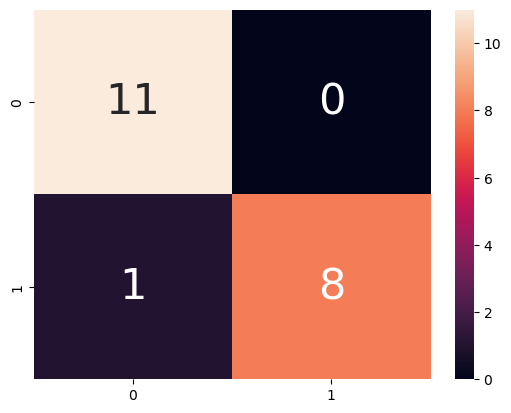

In [21]:
sk_array = [[tp, fn], [fp, tn]]
df = pd.DataFrame(sk_array, range(2), range(2))
sb.heatmap(df, annot = True, annot_kws = {"size" : 31})

print("sklearn's Confusion Matrix Plot")
print()
print("              Predicted Value")
print("True Value      TP     FN")
print("                FP     TN")
print()
print("              Predicted Value")
print(f"True Value      {tp : ^2}     {fn : ^2}")
print(f"                {fp : ^2}     {tn : ^2}")


sklearn ROC-AUC Score: 0.9444444444444444


Text(0.5, 1.0, 'Receiver Operating Characteristics')

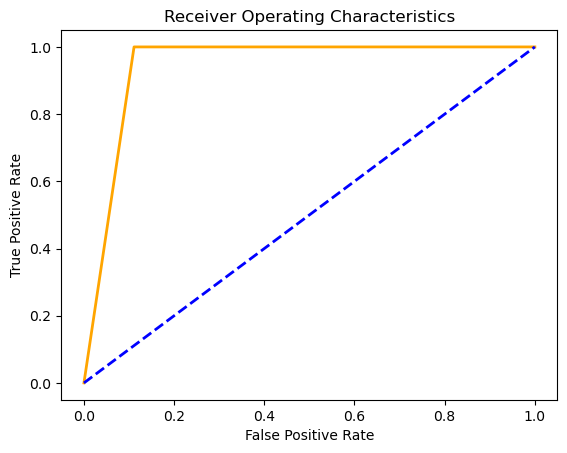

In [22]:
auc_score = roc_auc_score(actual_data, predicted_data)
print("sklearn ROC-AUC Score:", auc_score)

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(actual_data, predicted_data)

# Plot the ROC curve
plt.plot(fpr, tpr, color="orange", lw=2)
plt.plot([0, 1], [0, 1], color="blue", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
